In [1]:
L = [1,2,3,4]
len(L)

4

In [1]:
pip install timezonefinder


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.4/49.4 MB 10.7 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for cffi<2,>=1.15.1 from https://files.pythonhosted.org/packages/b4/f6/b28d2bfb5fca9e8f9afc9d05eae245bed9f6ba5c2897fefee7a9abeaf091/cffi-1.16.0-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Using cached cffi-1.16.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (1.5 kB)
  Obtaining dependency information for h3<4,>=3.7.6 from https://files.pythonhosted.org/packages/90/47/138ec5a36f369c2b14df3b93fe4be7576391c79bae55b9088979ba0f9186/h3-3.7.7-cp312-cp312-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for setuptools>=65.5 from https://files.pythonhosted.org/packages/51/a0/ee460cc54e68afcf33190d198299c9579a5eafeadef0016ae8563237ccb6/setuptools-71.1.0-py3-none-any.whl.metadata
  Using cached setuptools-71.1.0-py3-none-any

In [ ]:
from timezonefinder import TimezoneFinder # pip install timezonefinder
import openmeteo_requests # pip install openmeteo-requests
import requests_cache # pip install requests-cache 
from retry_requests import retry # pip install retry-requests 

In [14]:
#Import and install the following 
import openmeteo_requests #%pip install openmeteo-requests
import requests_cache #%pip install requests-cache retry-requests numpy pandas
import pandas as pd #%pip install ipympl
from retry_requests import retry
import matplotlib.pyplot as plt #necessary to plot data
import sys 

import numpy as np
import matplotlib.pyplot as plt

def select_variables(hourly_vars, daily_vars): #function to establish variables, scope, location and units of mesaurement and assign them to a single variable, params

	params = {
		"latitude": 40.6613,
		"longitude": -73.9463,
		"current": "temperature_2m",
		"hourly": hourly_vars, 
		"daily": daily_vars, 
		"temperature_unit": "fahrenheit",
		"wind_speed_unit": "mph",
		"timezone": "America/New_York",
		"forecast_days": 7
	}
	
	return params

In [15]:
def get_response(params): #sends params to API and gets back a data object (<openmeteo_sdk.WeatherApiResponse.WeatherApiResponse object at 0x14738ce50>)

	# More setup
	# Setup the Open-Meteo API client with cache and retry on error
	cache_session = requests_cache.CachedSession('.cache', expire_after = 3600)
	retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
	openmeteo = openmeteo_requests.Client(session = retry_session)

	url = "https://api.open-meteo.com/v1/forecast"
	
	responses = openmeteo.weather_api(url, params=params) #returns list of data objects
	response = responses[0] #gets single response from list 

	return response 

In [ ]:
def get_location_info(response): #gets whatever variable user selects; results could be shown as output in GUI

	# Process location and get current values.
	info = {}
	info ["Latitude"] = response.Latitude()
	info ["Longitude"] = response.Longitude()
	info ["Elevation"] = response.Elevation()
	info ["Timezone"] = response.Timezone()
	info ["Timezone_diff"] = response.UtcOffsetSeconds()
	
	return info

In [16]:
# Process hourly data and feed into an array

def process_hourly(response, hourly_vars):
	hourly = response.Hourly() 

	hourly_data = {"date": pd.date_range( #create keys in a dictionary
		start = pd.to_datetime(hourly.Time(), unit = "s", utc = True), #check for timezone
		end = pd.to_datetime(hourly.TimeEnd(), unit = "s", utc = True),
		freq = pd.Timedelta(seconds = hourly.Interval()),
		inclusive = "left"
	)}

	for i in range(0, len(hourly_vars)): #creates an array of hourly values for variables (i) 
		ar = hourly.Variables(i).ValuesAsNumpy() 
		key = hourly_vars[i]
		hourly_data[key] = ar

	hourly_dataframe = pd.DataFrame(data = hourly_data)
	return hourly_dataframe


In [17]:
def process_daily(response, daily_vars):
	daily = response.Daily() 

	daily_data = {"date": pd.date_range( #create keys in a dictionary
		start = pd.to_datetime(daily.Time(), unit = "s", utc = True), #check for timezone
		end = pd.to_datetime(daily.TimeEnd(), unit = "s", utc = True),
		freq = pd.Timedelta(seconds = daily.Interval()),
		inclusive = "left"
	)}

	for i in range(0, len(daily_vars)): #creates an array of daily values for variables (i) 
		ar = daily.Variables(i).ValuesAsNumpy() 
		key = daily_vars[i]
		daily_data[key] = ar
	daily_dataframe = pd.DataFrame(data = daily_data)
	return daily_dataframe

In [18]:
#Turn dataframe into a plot
def plot_hourly_data(hourly_dataframe, hourly_var_list):

	p = hourly_dataframe.plot(kind='line',
							x = 'date',
							y = hourly_var_list)
	plt.show()


In [19]:
#Turn dataframe into a plot
def plot_daily_data(daily_dataframe, daily_var_list):

	p = daily_dataframe.plot(kind='line',
							x = 'date',
							y = daily_var_list)
	plt.show()

Coordinates 40.67060852050781°N -73.93328857421875°E
Elevation 16.0 m asl
Timezone b'America/New_York' b'EDT'
Timezone difference to GMT+0 -14400 s
Current time 1719953100
Current temperature_2m 80.67019653320312
                       date  temperature_2m_max  temperature_2m_min
0 2024-07-02 04:00:00+00:00           82.110199           61.950203
1 2024-07-03 04:00:00+00:00           78.330200           62.220200
2 2024-07-04 04:00:00+00:00           84.254898           67.800201
3 2024-07-05 04:00:00+00:00           91.454895           74.714897
4 2024-07-06 04:00:00+00:00           84.794899           72.734894
5 2024-07-07 04:00:00+00:00           91.364899           73.454895
6 2024-07-08 04:00:00+00:00           89.474899           76.694901


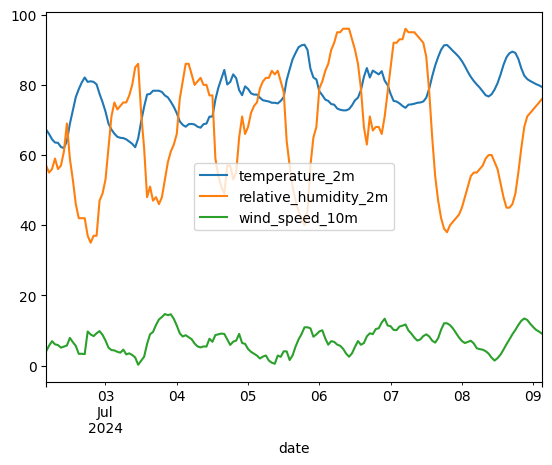

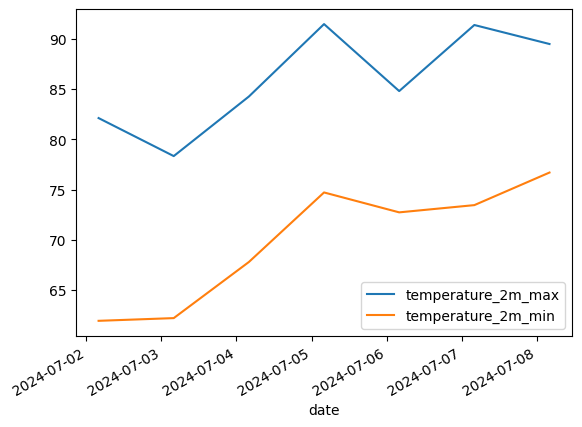

In [21]:
#Test
hourly_vars = ["temperature_2m","relative_humidity_2m", "wind_speed_10m"]
daily_vars = ["temperature_2m_max", "temperature_2m_min"]
p = select_variables(hourly_vars, daily_vars) #create 2 checkbox groups, you can have callback for every checkbox
resp = get_response(p)
print_location_info(resp)
hf = process_hourly(resp, hourly_vars)
df = process_daily(resp, daily_vars)
print(df)
plot_hourly_data(hf, hourly_vars)
plot_daily_data(df, daily_vars)

In [5]:
from tkinter import *
import tkinter as tk

#Tkinter for user to input weather variable; implement GUI as a class
class weather_app(tk.Tk): #dervied from Tk class (main class of tkinter module)
    def __init__(self):
        super().__init__() #initiates attributes of parent class
        self.title("Weather app") #title

        self.variable = StringVar(self)
        self.variable.set(" ") #default text (none)

        self.label = tk.Label(self, text="Select a weather variable") #label
        self.label.pack(pady=20)

        self.option_menu = OptionMenu(self, self.variable, "Temperature", "Relative Humidity", "Precipitation Probability") #dropdown options
        self.option_menu.pack()

        #self.entry = tk.Entry(self) #user input
        #self.entry.pack(pady=20)

        self.enter_button = tk.Button(self,text="Search", command=self.start_search)
        self.enter_button.pack(pady=20)
    
    def start_search(self):
        selected_variable = self.variable.get()
        #search_text =  self.entry.get() # Get the text from the Entry Widget
        print("Searching...")

app = weather_app()

app.mainloop()

In [4]:
#selectable text https://stackoverflow.com/questions/1602106/in-pythons-tkinter-how-can-i-make-a-label-such-that-you-can-select-the-text-wi

from tkinter import *

master = Tk()

w = Text(master, height=1, borderwidth=0)
w.insert(1.0, "Hello, world!")
w.pack()

w.configure(state="disabled")

# if tkinter is 8.5 or above you'll want the selection background
# to appear like it does when the widget is activated
# comment this out for older versions of Tkinter
w.configure(inactiveselectbackground=w.cget("selectbackground"))

mainloop()

In [1]:
from tkinter import *
import tkinter as tk

#Tkinter for user to input weather variable; implement GUI as a class
class weather_app(tk.Tk): #dervied from Tk class (main class of tkinter module)
    def __init__(self):
        super().__init__() #initiates attributes of parent class
        self.title("Weather app") #title

        self.variable = StringVar(self)
        self.variable.set(" ") #default text (none)

        self.tag = StringVar(self)
        self.tag.insert(1.0, "Hello, world!")
        self.tag.configure(state="disabled")

        #self.label = tk.Label(self, text="Select a weather variable") #label
        #self.label.pack(pady=20)

        #self.option_menu = OptionMenu(self, self.variable, "Temperature", "Relative Humidity", "Precipitation Probability") #dropdown options
        #self.option_menu.pack()

        #self.entry = tk.Entry(self) #user input
        #self.entry.pack(pady=20)

        self.enter_button = tk.Button(self,text="Search", command=self.start_search)
        self.enter_button.pack(pady=20)
    
    def start_search(self):
        selected_variable = self.variable.get()
        #search_text =  self.entry.get() # Get the text from the Entry Widget
        print("Searching...")


app = weather_app()

app.mainloop()

AttributeError: 'StringVar' object has no attribute 'insert'

In [8]:
#from tkinter import *
import tkinter as tk
from tkinter import Scrollbar, Listbox, Label, RIGHT, Y, END


#Tkinter for user to input weather variable; implement GUI as a class
class weather_app(tk.Tk): #dervied from Tk class (main class of tkinter module)
    def __init__(self):
        super().__init__() #initiates attributes of parent class
        self.title("Weather app") #title
        
        # for scrolling vertically 
        self.yscrollbar = Scrollbar(self) 
        self.yscrollbar.pack(side = RIGHT, fill = Y) 
        
        self.label = Label(self, 
                    text = "Customize your weather report", 
                    font = ("Times New Roman", 16),  
                    padx = 10, pady = 10) 
        self.label.pack() 

        self.listbox = Listbox(self, selectmode = "multiple",  
                    yscrollcommand = self.yscrollbar.set) 
        
        # Widget expands horizontally and  
        # vertically by assigning both to 
        # fill option 
        self.listbox.pack(padx = 10, pady = 10, 
                expand = YES, fill = "both") 
        
        weather_variables =[self, self.variable, "temperature", "feels like", "rain", "chance of rain", "showers", "snowfall", "wind speed", "wind direction", "sunrise (daily only)", "sunset (daily only)", "UV index (daily only)", "visibility (hourly only)", "humidity (hourly only)", "dewpoint (hourly only)"] 

        for index, item in enumerate(weather_variables):
            self.listbox.insert(END, item)
            self.listbox.itemconfig(index, bg="lime")

    
        # Attach listbox to vertical scrollbar 
        self.yscrollbar.config(command = self.listbox.yview) 

        self.enter_button = tk.Button(self,text="Search", command=self.start_search)
        self.enter_button.pack(pady=20)
    
    def start_search(self):
        selected_variable = self.variable.get()
        #search_text =  self.entry.get() # Get the text from the Entry Widget
        print("Searching...")

if __name__ == "__main__":
    app = weather_app()
    app.mainloop()

NameError: name 'YES' is not defined

In [4]:
import tkinter as tk

class weather_app(tk.Tk): #dervied from Tk class (main class of tkinter module)
    def __init__(self):
        super().__init__() #initiates attributes of parent class
        self.title("Weather app") #title
        self.minsize(300, 200)  # width, height
        self.geometry("400x350+50+50")
        self.setupWindow()

    def setupWindow(self):
        title = Label(self, text="Customize your weather report",
            font=('Helvetica', 20), bd=10)
        title.pack()
        
        self.var = tk.IntVar(self)
        self.item1 = tk.Checkbutton(root, text="temperature", variable=var, command=self.search_weather)
        self.item1.pack(anchor="w")

    def search_weather(self):
        results =  self.var.get() #get selected weather variables

In [15]:
from tkinter import (Tk, ttk, Label, Frame, Button,
    Checkbutton, Radiobutton, IntVar, HORIZONTAL, PhotoImage)

class  weather_app(Tk):

    def __init__(self):
        super().__init__()
        #self.initializeUI()
        self.title("Weather app")
        self.minsize(300, 200)  # width, height
        self.geometry("350x500+50+50")
        self.setupWindow()

    def setupWindow(self): #Set up the widgets.
        title = Label(self, text="Customize your weather report",
            font=('Helvetica', 20), bd=10)
        title.grid(row=0, column=0, columnspan=2, pady=10)

        line = ttk.Separator(self, orient=HORIZONTAL)
        line.grid(row=1, column=0, columnspan=2, sticky='ew', pady=5)

        order_label = Label(self, text="Choose your variables", bd=10)
        order_label.grid(row=2, column=0, columnspan=2, pady=10)

         # Create a frame to hold the checkbuttons
        checkbox_frame = Frame(self)
        checkbox_frame.grid(row=3, column=0, columnspan=2)

        weather_variable_list = ["temperature", "feels like", "rain", "chance of rain", "showers", "snowfall", "wind speed", "wind direction", "sunrise (daily only)", "sunset (daily only)", "UV index (daily only)", "visibility (hourly only)", "humidity (hourly only)", "dewpoint (hourly only)"]
        self.var_dict = {}

        # Populate the dictionary with checkbutton widgets and arrage them in a grid
        for  i, weather_var in  enumerate(weather_variable_list):

            # Set the text for each checkbutton
            self.var_dict[weather_var] = Checkbutton(checkbox_frame, text=weather_var)

            # Create a new instance of IntVar() for each checkbutton
            self.var_dict[weather_var].var = IntVar()

            # Set the variable parameter of the checkbutton
            self.var_dict[weather_var]['variable'] = self.var_dict[weather_var].var

            # Arrange the checkbutton in the window
            self.var_dict[weather_var].grid(row=i//2, column=i % 2, sticky='w')

        scope_label = Label(checkbox_frame, text="Choose your time range", bd=10)
        scope_label.grid(row=(len(weather_variable_list)//2) + 2, column=0, columnspan=2, pady=10)

        # Create integer variable
        self.var = IntVar()
        self.var.set(0)  # Use set() initialize the variable
        self.ranges = ["hourly report", "daily summary"]

        for  i, range in  enumerate(self.ranges):
            self.rngs = Radiobutton(checkbox_frame, text=range, variable=self.var, value=i)
            self.rngs.grid(row=(len(weather_variable_list)//2) + 3 + i, column=0, sticky='w')


        # Use ttk to add styling to button
        style = ttk.Style()
        style.configure('TButton', bg='skyblue', fg='white')

        # Create button that will call the range to display text and close the program
        search_button = ttk.Button(self, text="Search", command=self.printResults)
        search_button.grid(row=5, column=0, columnspan=2, pady=10)

        # Add a label for displaying the image
        self.image_label = Label(self)
        self.image_label.grid(row=6, column=0, columnspan=2, pady=5)

    def printResults(self):
        """Print the results of the checkboxes and radio buttons."""
        for  item in  self.var_dict.values():
            if  item.var.get():
                print('Item selected: {}'.format(item['text']))

        index = self.var.get()
        print("Range: {}".format(self.ranges[index]))
        self.quit()

if  __name__  ==  "__main__":
    app = weather_app()
    app.mainloop()


PY_VAR74
Item selected: snowfall
Range: hourly report


In [27]:
from tkinter import *
from tkinter import ttk
import requests
from urllib.parse import quote_plus

class  weather_app(Tk):

    def __init__(self):
        super().__init__()
        #self.initializeUI()
        self.title("Weather app")
        self.minsize(300, 200)  # width, height
        self.geometry("350x500+50+50")
        self.setupWindow()

    def setupWindow(self): #Set up the widgets.
        title = Label(self, text="Customize your weather report",
            font=('Helvetica', 20), bd=10)
        title.grid(row=0, column=0, columnspan=2, pady=10)

        line = ttk.Separator(self, orient=HORIZONTAL)
        line.grid(row=1, column=0, columnspan=2, sticky='ew', pady=5)

        #first widget to get city
        self.label = Label(self, text="Location:") #Label       
        self.label.grid(row=2, column=0, padx=5, pady=5, sticky="e")
        self.entry = Entry(self) #Entry widget
        self.entry.grid(row=2, column=1, padx=5, pady=5, sticky="ew")

        order_label = Label(self, text="Choose your variables", bd=10)
        order_label.grid(row=3, column=0, columnspan=2, pady=10)

         # Create a frame to hold the checkbuttons
        checkbox_frame = Frame(self)
        checkbox_frame.grid(row=4, column=0, columnspan=2)

        weather_variable_list = ["temperature", "feels like", "rain", "chance of rain", "showers", "snowfall", "wind speed", "wind direction", "sunrise (daily only)", "sunset (daily only)", "UV index (daily only)", "visibility (hourly only)", "humidity (hourly only)", "dewpoint (hourly only)"]
        self.var_dict = {}

        # Populate the dictionary with checkbutton widgets and arrage them in a grid
        for  i, weather_var in  enumerate(weather_variable_list):

            # Set the text for each checkbutton
            self.var_dict[weather_var] = Checkbutton(checkbox_frame, text=weather_var)

            # Create a new instance of IntVar() for each checkbutton
            self.var_dict[weather_var].var = IntVar()

            # Set the variable parameter of the checkbutton
            self.var_dict[weather_var]['variable'] = self.var_dict[weather_var].var

            # Arrange the checkbutton in the window
            self.var_dict[weather_var].grid(row=i//2, column=i % 2, sticky='w')

        scope_label = Label(checkbox_frame, text="Choose your time range", bd=10)
        scope_label.grid(row=(len(weather_variable_list)//2) + 2, column=0, columnspan=2, pady=10)

        # Create integer variable
        self.mode = IntVar() #memory holder of which of 2 things is currently
        self.mode.set(0)  # Use set() initialize the variable
        self.ranges = ["hourly report", "daily summary"]

        for  i, range in  enumerate(self.ranges):
            self.rngs = Radiobutton(checkbox_frame, text=range, variable=self.mode, value=i)
            self.rngs.grid(row=(len(weather_variable_list)//2) + 3 + i, column=0, sticky='w')

        # Use ttk to add styling to button
        style = ttk.Style()
        style.configure('TButton', bg='skyblue', fg='white')

        # Create button that will call the range to display text and close the program
        search_button = ttk.Button(self, text="Search", command=self.search_weather)
        search_button.grid(row=6, column=0, columnspan=2, pady=10)

        # Add a label for displaying the plot
        self.image_label = Label(self)
        self.image_label.grid(row=7, column=0, columnspan=2, pady=5)


    def get_lat_long(self, address): # "Marengo, Iowa, USA"
        # URL encode the address
        encoded_address = quote_plus(address)
        # Construct the Nominatim API URL
        url = f"https://nominatim.openstreetmap.org/search?format=json&q={encoded_address}"
        # Send the request to the Nominatim API
        response = requests.get(url, headers={'User-Agent': 'Python Geocoding Example'})
        # Parse the JSON response
        data = response.json()
        # Return the first result (if any)
        if data is not None:
            return data[0].get('lat'), data[0].get('lon')
        else:
            return None, None
        

    def search_weather(self):
        results =  self.var.get() #self.var is the selected variables?

        if self.ranges == "hourly report": #if the range selected was "hourly", place all selected variables in the hourly_vars list and vice versa
            hourly_vars = [] 
            for w in self.var:
                hourly_vars.append(results)
        else:
            daily_vars = []
            for w in self.var:
                daily_vars.append(results)

        #send list to process_hourly or process_daily
        #Im not sure how to tell code to choose the populated list
                

      


if  __name__  ==  "__main__":
    app = weather_app()
    app.mainloop()
